# Final Project Submission

Please fill out:
* Student name: **Cynthia Wanyonyi**
* Student pace: **Part time**
* Scheduled project review date/time: **16/4/2023**
* Instructor name: **Noah Kandie**

### Business Problem
Microsoft is embarking on an exciting new venture - creating a new movie studio. The movie industry has been rapidly evolving, and Microsoft has decided to jump in on the action. However, as a technology company, they don't have expertise in the film industry. 

The purpose of this project is to explore what types of films are currently performing well at the box office and provide actionable insights to help Microsoft's new movie studio make informed decisions about what type of films to create. This presentation, hopes to provide valuable insights that will help guide Microsoft's foray into the movie industry.

Questions that will guide the analysis
1. Optimal runtime for a film
2. Best movie directors to hire
3. Genre profit margins for local vs worlwide sales

### Importing Libraries
We will load the necessary datasets needed for our analysis

In [3]:
import pandas as pd # this library will help in working with dataframes
import numpy as np # to help with mathematical calculations
import sqlite3 # for working with the SQL dataset

import matplotlib.pyplot as plt # for creating plots

# to display the plots within the notebook
%matplotlib inline

### Reading the datasets
Here we look at the different datasets and determine which one is most relevant based on the questions we are going to answer

In [4]:
movie_info = pd.read_table('zippedData/rt.movie_info.tsv')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t', encoding='iso-8859-1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
movie_sales = pd.read_csv('zippedData/bom.movie_gross.csv')
movie_sales.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data Cleaning and Analysis 

#### Finding the optimal runtime for a film. 
In this step we will use SQL to analyse the imdb database.
The first step will be to find the top 5 highly rated genres. For each of the top five genres we will plot the relationship between runtime and revenue of the genre.

In [9]:
conn= sqlite3.connect('zippedData/im.db')

In [10]:
# Read the table movie_basics within the imdb database
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
# Read the table movie_ratings within the imdb database
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
# Join the two tables on the 'movie_id' column
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id')
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [14]:
# drop the rows with missing values in the genres and runtime column
merged_df = merged_df.dropna(subset=['runtime_minutes', 'genres'])

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [16]:
# Calculate the first quartile (Q1) of the runtime_minutes column
Q1 = merged_df['runtime_minutes'].quantile(0.25)

# Calculate the third quartile (Q3) of the runtime_minutes column
Q3 = merged_df['runtime_minutes'].quantile(0.75)

# Calculate the interquartile range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Calculate the lower bound as Q1 - 1.5*IQR and the upper bound as Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Remove any rows where the runtime_minutes value is less than the lower bound or greater than the upper bound
merged_df = merged_df[(merged_df['runtime_minutes'] >= lower_bound) & (merged_df['runtime_minutes'] <= upper_bound)]

Finding the top highly rated genres

In [17]:
genre_counts = merged_df['genres'].value_counts()
print(genre_counts)

Drama                    9777
Documentary              8637
Comedy                   4414
Comedy,Drama             2335
Horror                   2194
                         ... 
Music,Musical               1
Drama,Romance,Western       1
Crime,Family,Horror         1
Horror,Sport,Thriller       1
History,Romance             1
Name: genres, Length: 895, dtype: int64


In [18]:
genre_df = merged_df.assign(genres = merged_df['genres'].str.split(',')).explode('genres')
unique_genre_df = genre_df.drop_duplicates(subset=['genres'])
unique_genre_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Animation,8.1,263
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6
15,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,Mystery,4.0,12
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248


In [19]:
# group the data by genre and calculate the average rating and total number of votes
genre_ratings = unique_genre_df.groupby('genres')[['averagerating', 'numvotes']].mean()

# sort the genres by their average rating and number of votes
top_genres = genre_ratings.sort_values(['averagerating', 'numvotes'], ascending=[False, False])

# get the top 5 highly rated genres
top4_genres = top_genres.index[1:5]

top4_genres

Index(['Animation', 'Family', 'Sport', 'Documentary'], dtype='object', name='genres')

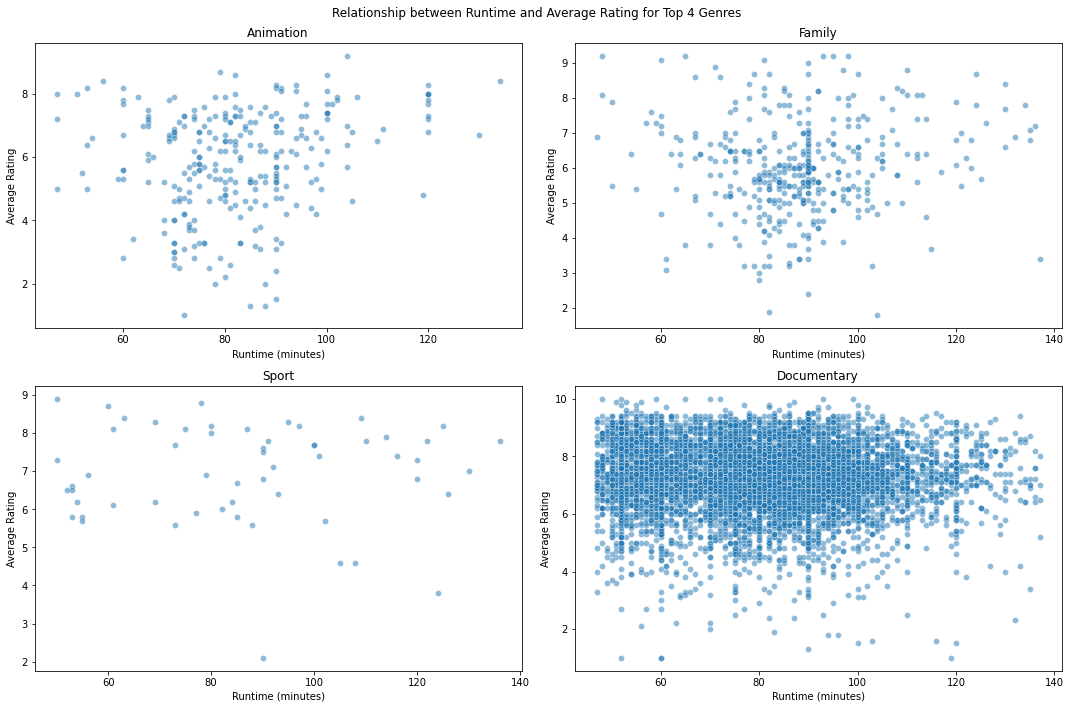

In [20]:
# loop through each genre and plot the relationship between runtime and rating
import seaborn as sns

# Create a 2x3 grid of subplots using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop over the top 5 genres and plot a scatter plot for each one
for i, genre in enumerate(top4_genres):
    # Select the data for the current genre
    data = merged_df[merged_df['genres'] == genre]
    
    # Plot a scatter plot of runtime vs average rating using Seaborn
    sns.scatterplot(data=data, x='runtime_minutes', y='averagerating', ax=axs[i], alpha=0.5)
    
    # Set the axis labels and title for the subplot
    axs[i].set_xlabel('Runtime (minutes)')
    axs[i].set_ylabel('Average Rating')
    axs[i].set_title(genre)

# Set the overall title for the plot
plt.suptitle('Relationship between Runtime and Average Rating for Top 4 Genres')

# Use tight_layout to improve the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


The optimal time for a film as shown in the figures above is between 70 to 100 minutes

#### Who are the best Directors to Use for each genre?

In [21]:
directors = pd.read_sql('''
SELECT movie_id, (primary_name) AS director
FROM principals
JOIN persons
USING(person_id)
WHERE category = 'director'
''', conn)
# there are sometimes multiple directors for each movie so these three lines will group them together by movie
directors = directors.drop_duplicates()
seperator = ','
directors = directors.groupby('movie_id').agg(lambda x: seperator.join(x.tolist())).reset_index()
directors

,movie_id,director
0,tt0063540,Harnam Singh Rawail
1,tt0066787,Mani Kaul
2,tt0069049,Orson Welles
3,tt0069204,Hrishikesh Mukherjee
4,tt0100275,"Raoul Ruiz,Valeria Sarmiento"
...,...,...
128431,tt9916538,Azhar Kinoi Lubis
128432,tt9916622,"Angela Gurgel,Ana Célia de Oliveira"
128433,tt9916706,Kanchan Nayak
128434,tt9916730,Kiran Gawade


In [22]:
# join the merged_df and the directors table

# join the two tables using the movie_id column
sql_df = pd.merge(merged_df, directors, on='movie_id')
sql_df.drop(['original_title', 'start_year'], axis=1, inplace=True)
sql_df

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,director
0,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43,Mani Kaul
1,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517,Orson Welles
2,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119,"Raoul Ruiz,Valeria Sarmiento"
3,tt0146592,Pál Adrienn,136.0,Drama,6.8,451,Ágnes Kocsis
4,tt0154039,So Much for Justice!,100.0,History,4.6,64,Miklós Jancsó
...,...,...,...,...,...,...,...
57305,tt9910930,Jeg ser deg,75.0,"Crime,Documentary",6.1,7,Maria Salazar
57306,tt9911774,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365,Vineesh Aaradya
57307,tt9913056,Swarm Season,86.0,Documentary,6.2,5,Sarah Christman
57308,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6,Giancarlo Soldi


In [23]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57310 entries, 0 to 57309
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         57310 non-null  object 
 1   primary_title    57310 non-null  object 
 2   runtime_minutes  57310 non-null  float64
 3   genres           57310 non-null  object 
 4   averagerating    57310 non-null  float64
 5   numvotes         57310 non-null  int64  
 6   director         57310 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ MB


In [24]:
sql_df.rename(columns={'primary_title': 'title'}, inplace=True)
tmdbsql = pd.merge(sql_df, tmdb_movies, how='outer', on='title')

# fill in the missing info with the other columns
tmdbsql['averagerating'] = tmdbsql['averagerating'].fillna(tmdbsql['vote_average'])
tmdbsql['numvotes'] = tmdbsql['numvotes'].fillna(tmdbsql['vote_count'])
tmdbsql['genres'] = tmdbsql['genres'].fillna(tmdbsql['genre_ids'])

# drop the duplicate columns
tmdbsql.drop(['genre_ids', 'popularity', 'vote_average', 'vote_count', 'original_title', 'original_language'], axis=1, inplace=True)

# sort the values by number of votes which indicates the popularity of the movie
tmdbsql = tmdbsql.sort_values('numvotes', ascending=False)

# get rid of the smaller movies with less than a hundred reviews
tmdbsql = tmdbsql[tmdbsql['numvotes'] > 100]
tmdbsql

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,director,id,release_date
1043,tt1130884,Shutter Island,138.0,"Mystery,Thriller",8.1,1005960.0,Martin Scorsese,11324.0,2010-02-18
14762,tt2015381,Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394.0,James Gunn,118340.0,2014-08-01
2919,tt1431045,Deadpool,108.0,"Action,Adventure,Comedy",8.0,820847.0,Tim Miller,293660.0,2016-02-12
23528,tt2488496,Star Wars: Episode VII - The Force Awakens,136.0,"Action,Adventure,Fantasy",8.0,784780.0,J.J. Abrams,NaN,NaN
2583,tt1392190,Mad Max: Fury Road,120.0,"Action,Adventure,Sci-Fi",8.1,780910.0,George Miller,76341.0,2015-05-15
...,...,...,...,...,...,...,...,...,...
27840,tt2980728,Touch the Wall,101.0,"Documentary,Family,Sport",7.3,101.0,"Grant Barbeito,Christo Brock",299510.0,2014-11-15
56004,tt7683350,Weapon of Choice,90.0,Documentary,4.2,101.0,"Fritz Ofner,Eva Hausberger",NaN,NaN
35235,tt3786530,The Big Bee,138.0,Thriller,5.9,101.0,Yukihiko Tsutsumi,NaN,NaN
50070,tt7335324,Hex,88.0,"History,Horror,Thriller",4.3,101.0,"George Popov,Jonathan Russell",NaN,NaN


In [25]:
# Group the data by director and genre and calculate the sum of the number of votes for each group
director_votes = tmdbsql.groupby('director', dropna=False)['numvotes'].sum().reset_index()

# Sort the data in descending order of the number of votes
director_votes = director_votes.sort_values('numvotes', ascending=False)
director_votes

,director,numvotes
10641,Matthew Vaughn,2195313.0
3376,Damien Chazelle,2105972.0
9765,M. Night Shyamalan,2092304.0
4060,Denis Villeneuve,1955468.0
3885,David O. Russell,1899133.0
...,...,...
4680,Enrique R. Bencomo,101.0
5250,"Fritz Ofner,Eva Hausberger",101.0
5474,"George Popov,Jonathan Russell",101.0
4964,Farid Eslam,101.0


<ipython-input-26-14f7ddc74431>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, fontsize=15)


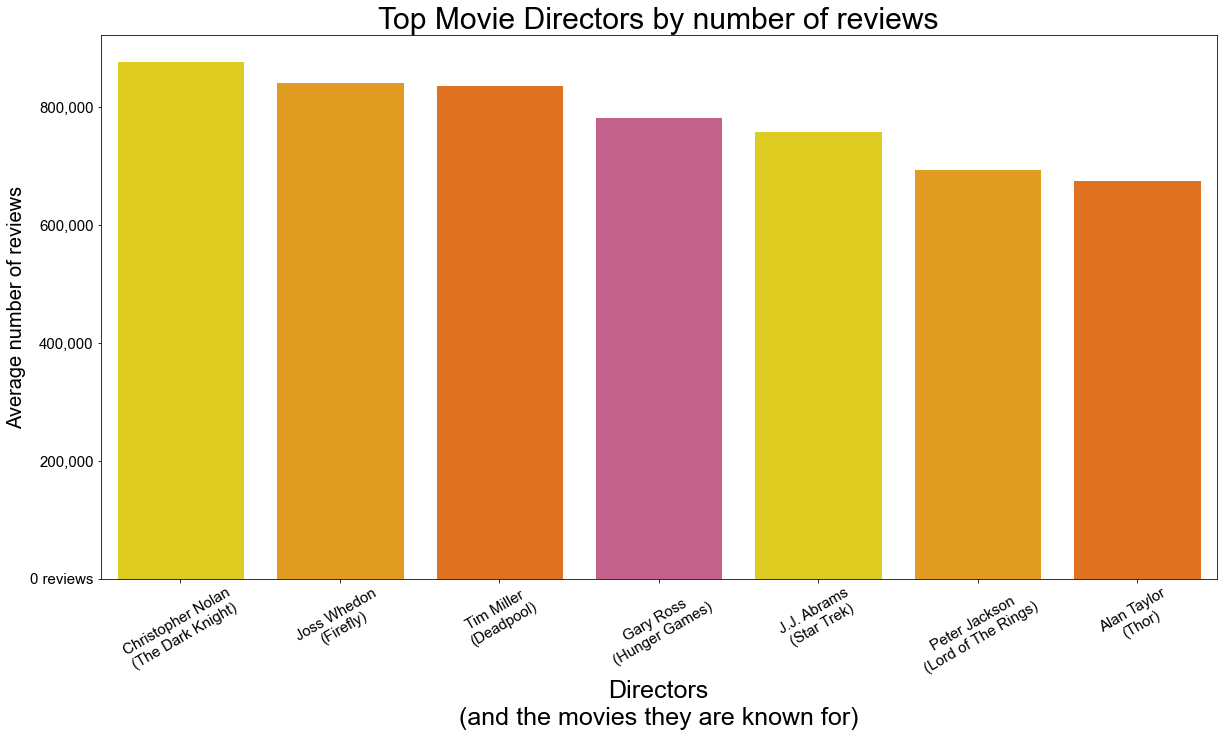

In [26]:
# Create a bar graph using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_style('darkgrid')
palette = sns.color_palette(['#ffe600', '#ffa600', '#ff6e00', '#d45087'])
g = sns.barplot(data=director_votes.head(7), x='director', y='numvotes', ax=ax, ci=None, palette=palette)

# Set labels and title
ax.set_xlabel('Directors\n(and the movies they are known for)', fontsize=25)
ax.set_ylabel('Average number of reviews', fontsize=20)
ax.set_title('Top Movie Directors by number of reviews', fontsize=30)

# Set y-axis tick labels
yticklabels = ['0 reviews', '200,000', '400,000', '600,000', '800,000', '1 million',
               '1.2 million', '1.4 million', '1.6 million']
ax.set_yticklabels(yticklabels, fontsize=15)

# Set x-axis tick labels
xticklabels = ['Christopher Nolan\n(The Dark Knight)', 'Joss Whedon\n(Firefly)', 'Tim Miller\n(Deadpool)', 
               'Gary Ross\n(Hunger Games)', 'J.J. Abrams\n(Star Trek)', 'Peter Jackson\n(Lord of The Rings)', 
               'Alan Taylor\n(Thor)']
ax.set_xticklabels(xticklabels, fontsize=15, rotation=30, ha='center')
  
plt.show();

#### Production Cost vs The Return on Investment
The core objective of businesses is to make profits. We should therefore ensure microsoft makes movies that are profitable

In [31]:
# merge the movie_budgets and movie_info tables and keep only the genre column from the movie_info table
profit = pd.merge(movie_budgets, movie_info[['id', 'genre']], on='id')
profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Action and Adventure|Classics|Drama
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",Action and Adventure|Classics|Drama
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430",Action and Adventure|Classics|Drama
3,1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177",Action and Adventure|Classics|Drama
4,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309",Action and Adventure|Classics|Drama
...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,"$1,000,000",$0,"$552,614",Comedy|Drama
4678,100,"Oct 11, 2013",Escape from Tomorrow,"$650,000","$171,962","$171,962",Comedy|Drama
4679,100,"Jul 11, 2014",As It Is in Heaven,"$450,000","$13,486","$13,486",Comedy|Drama
4680,100,"Dec 31, 2014",Horse Camp,"$250,000",$0,$0,Comedy|Drama


We calculate the profit margins for the different genres and find the genres with the highest profit margins.
We start by calculating worldwide profit margins

In [28]:
# Convert the production budget and worldwide gross columns to numeric types
profit['production_budget'] = pd.to_numeric(profit['production_budget'].str.replace('$', '').str.replace(',', ''))
profit['worldwide_gross'] = pd.to_numeric(profit['worldwide_gross'].str.replace('$', '').str.replace(',', ''))

# Calculate the profit margin for each movie in percentage
profit['profit_margin'] = (profit['worldwide_gross'] - profit['production_budget']) / profit['production_budget'] * 100

# Group the movies by genre and calculate the mean profit margin for each genre
mean_profit_margin_by_genre = profit.groupby('genre')['profit_margin'].mean()

# Get the top ten genres based on the mean profit margin
top_ten_genres = mean_profit_margin_by_genre.nlargest(10)

# Display the top ten genres with their mean profit margin
print(top_ten_genres)

genre
Comedy|Musical and Performing Arts                                      1776.902850
Classics|Comedy|Drama|Romance                                            966.634871
Action and Adventure|Art House and International|Drama                   828.569830
Drama|Romance                                                            717.783275
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance          653.737826
Classics|Drama                                                           570.922091
Documentary                                                              536.433672
Classics|Comedy|Musical and Performing Arts                              486.839892
Art House and International|Comedy|Drama|Musical and Performing Arts     467.503985
Drama|Musical and Performing Arts|Romance                                435.853207
Name: profit_margin, dtype: float64


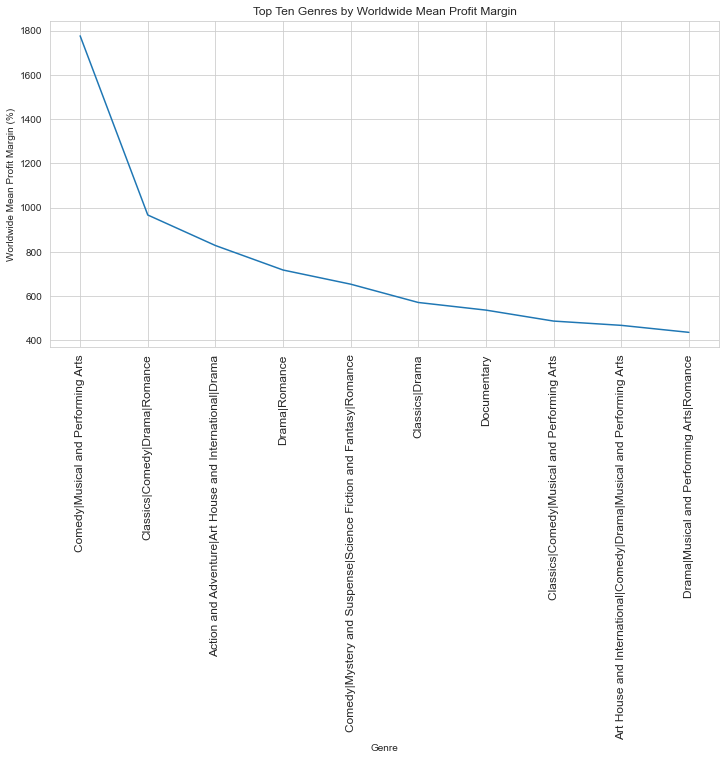

In [29]:
# Create a line graph using seaborn of the worldwide mean profit margins for the top ten genres

# Set the style and size of the figure
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Plot the line chart
sns.lineplot(x=top_ten_genres.index, y=top_ten_genres.values)
plt.xticks(rotation=90, fontsize=12)

# Set the title and labels for the axes
plt.xlabel("Genre")
plt.ylabel("Worldwide Mean Profit Margin (%)")
plt.title("Top Ten Genres by Worldwide Mean Profit Margin")

# Show the plot
plt.show()

We now calculate domestic profit margins

In [32]:
# Convert the production budget and worldwide gross columns to numeric types
profit['production_budget'] = pd.to_numeric(profit['production_budget'].str.replace('$', '').str.replace(',', ''))
profit['domestic_gross'] = pd.to_numeric(profit['domestic_gross'].str.replace('$', '').str.replace(',', ''))

# Calculate the profit margin for each movie in percentage
profit['profit_margin'] = (profit['domestic_gross'] - profit['production_budget']) / profit['production_budget'] * 100

# Group the movies by genre and calculate the mean profit margin for each genre
domestic_mean_profit_margin_by_genre = profit.groupby('genre')['profit_margin'].mean()

# Get the top ten genres based on the mean profit margin
domestic_top_ten_genres = domestic_mean_profit_margin_by_genre.nlargest(10)

# Display the top ten genres with their mean profit margin
print(domestic_top_ten_genres)

genre
Comedy|Musical and Performing Arts                                 1659.424994
Classics|Comedy|Drama|Romance                                       545.320583
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance     470.592437
Action and Adventure|Art House and International|Drama              424.487271
Drama|Romance                                                       384.477916
Mystery and Suspense                                                307.506654
Documentary                                                         300.753004
Drama|Kids and Family                                               297.349781
Classics|Drama                                                      272.796142
Classics|Comedy|Musical and Performing Arts                         250.569002
Name: profit_margin, dtype: float64


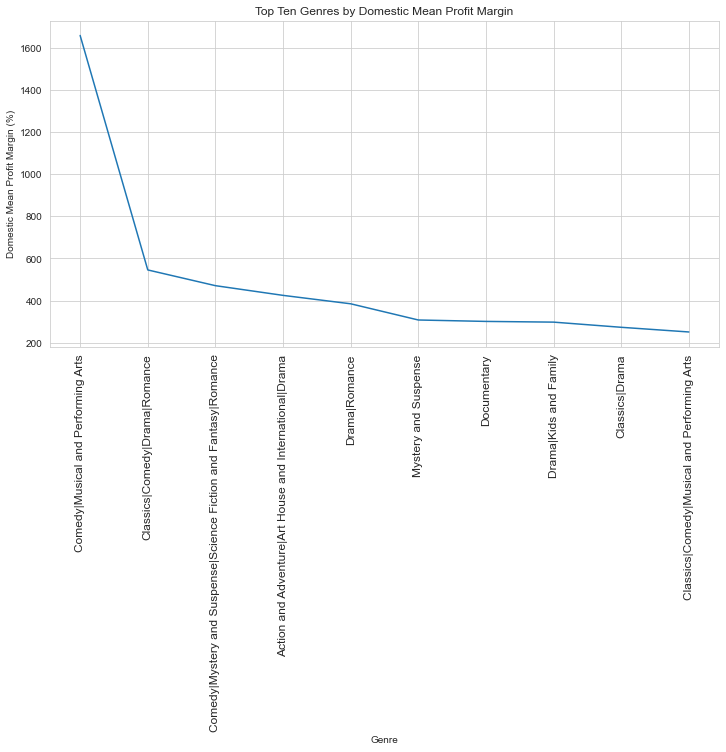

In [33]:
# Create a line graph using seaborn of the domestic mean profit margins for the top ten genres

# Set the style and size of the figure
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Plot the line chart
sns.lineplot(x=domestic_top_ten_genres.index, y=domestic_top_ten_genres.values)
plt.xticks(rotation=90, fontsize=12)

# Set the title and labels for the axes
plt.xlabel("Genre")
plt.ylabel("Domestic Mean Profit Margin (%)")
plt.title("Top Ten Genres by Domestic Mean Profit Margin")

# Show the plot
plt.show()

### Reccomendations
1. Make an Animation, Family, Documentary or Sport film, rated G between 70 to 90 minutes

2. Hire Directors like Christopher Nolan, Joss Whedon, Tim Miller, Gary Ross, J.J. Abrams, Peter Jackson, Alan Taylor that produce movies that get very high ratings

3. International markets yield higher profits especially for the Comedy, Musical, Classics, Drama and Romance films however marketing costs are higher. Local markets yield lesser profits however marketing costs are lower